<a href="https://colab.research.google.com/github/Zule-Carriazo/Ejercicios.Tarea2-POO/blob/main/Trabajo_sistema_de_recomendaci%C3%B3n_Zuleima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes grupo 5
- Zuleima Beatriz Carriazo Manchego
- Miyanis Manuela Londoño Vélez
- Julián Alejandro Úsuga Ortiz
- Deivid Zhang Figueroa

# Se cargan las bibliotecas necesarias

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Introducción:
En el contexto actual, la minería de datos juega un papel fundamental en la creación de sistemas de recomendación, que permiten personalizar la experiencia del usuario al sugerirle productos, servicios o contenido basado en sus preferencias. En este trabajo práctico, exploraremos la generación de reglas de asociación utilizando los algoritmos Apriori y FP-Growth, aplicados a un conjunto de datos proveniente de MovieLens (https://movielens.org/) una plataforma académica dedicada al estudio de sistemas de recomendación.

El objetivo de este trabajo es que los estudiantes se familiaricen con las técnicas de minería de datos y desarrollen un sistema de recomendación que utilice estas técnicas. Empezaremos con la generación de reglas de asociación, para luego evolucionar hacia un algoritmo de filtrado colaborativo basado en ítems.

# Dataset:

El dataset de MovieLens está dividido en tres partes: entrenamiento, prueba y validación. Deben utilizar la parte de entrenamiento para construir su modelo y evaluar su rendimiento en las partes de prueba y validación.

Para esta actividad se realizó un preprocesamiento en los datos para que puedan ser leídos en formato transacción. Cada transacción representa a un usuario y los itemsets de las transacciones son películas con calificaciones positivas realizadas por el usuario (al menos 3 estrellas de 5).

# Enunciados

#### 1. Generación de Reglas de Asociación:
- Realiza una exploración inicial del dataset.
- ¿Cuál fue el soporte y la confianza mínima que estableciste para la generación de reglas? Justifica tu elección.
- ¿Cuántas reglas de asociación obtuviste y cuáles consideras más relevantes?
Explica por qué.

#### 1.A: Realiza una exploración inicial del dataset        

Se carga el dataset con los datos de entrenamiento, y se verifica información general del dataset, se comprueban los valores faltantes en cada columna, y se obtiene el número de usuarios y películas únicas

In [4]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')

df.info()

print(df.isnull().sum())

num_users = df['user_id'].nunique()
num_movies = df['movie_id'].nunique()

print(f"Usuarios únicos: {num_users}")
print(f"Películas únicas: {num_movies}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768536 entries, 0 to 768535
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     768536 non-null  int64 
 1   movie_id    768536 non-null  int64 
 2   movie_name  768536 non-null  object
dtypes: int64(2), object(1)
memory usage: 17.6+ MB
user_id       0
movie_id      0
movie_name    0
dtype: int64
Usuarios únicos: 5539
Películas únicas: 3621


Se presentan las 10 transacciones finsles para entender la estructura

In [6]:
df.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_id,movie_id,movie_name
768526,6040,1242,Glory (1989)
768527,6040,2725,Twin Falls Idaho (1999)
768528,6040,910,Some Like It Hot (1959)
768529,6040,1537,Shall We Dance? (Shall We Dansu?) (1996)
768530,6040,162,Crumb (1994)
768531,6040,2395,Rushmore (1998)
768532,6040,1077,Sleeper (1973)
768533,6040,908,North by Northwest (1959)
768534,6040,1172,Cinema Paradiso (1988)
768535,6040,32,Twelve Monkeys (1995)


### Frecuencia de las películas más vistas

Se muestra el top de las 10 películas más vistas, y la frecuencia de interacción con ellas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


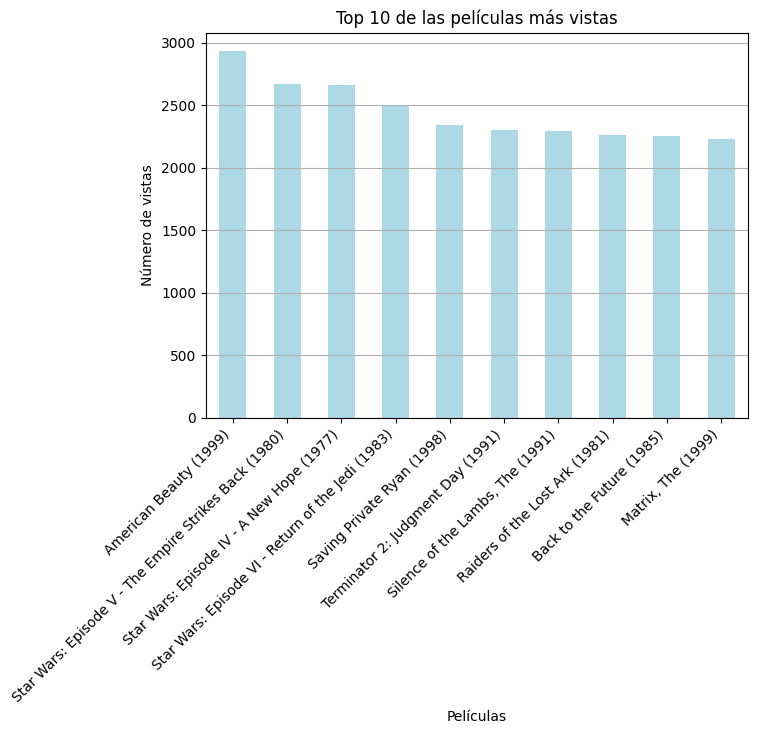

Top 10 de las películas más vistas: movie_name
American Beauty (1999)                                   2934
Star Wars: Episode V - The Empire Strikes Back (1980)    2665
Star Wars: Episode IV - A New Hope (1977)                2664
Star Wars: Episode VI - Return of the Jedi (1983)        2504
Saving Private Ryan (1998)                               2340
Terminator 2: Judgment Day (1991)                        2304
Silence of the Lambs, The (1991)                         2290
Raiders of the Lost Ark (1981)                           2261
Back to the Future (1985)                                2252
Matrix, The (1999)                                       2226
Name: count, dtype: int64


In [7]:
# Contar la cantidad de veces que cada película ha sido vista
top_movies = df['movie_name'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(7,5))
top_movies.plot(kind='bar', color='lightblue')

# Configurar el gráfico
plt.title('Top 10 de las películas más vistas')
plt.xlabel('Películas')
plt.ylabel('Número de vistas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Mostrar el gráfico
plt.show()

# Mostrar el DataFrame con el Top 10 de películas
print("Top 10 de las películas más vistas:", top_movies)


### Distribución de la cantidad de películas vistas por usuario

El gráfico refleja el comportamiento de visualización de películas que tienen los usuarios registrados en la plataforma, donde como es de esperarse, la mayor parte de ellos vieron entre 1 y 250 películas, mientras una minoría tuvo mayor cantidad de interacción con estás peliculas.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


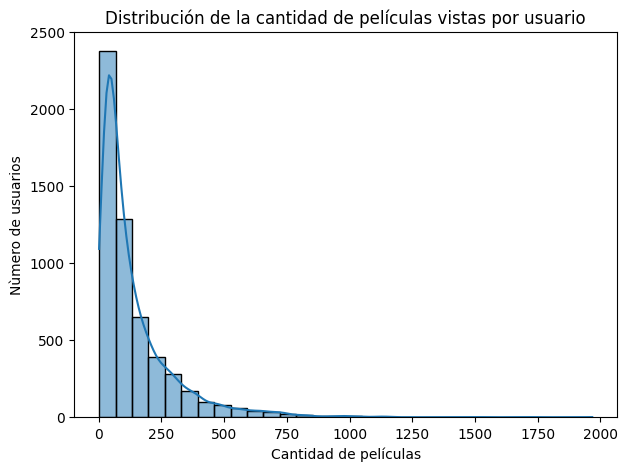

In [8]:
user_movie_counts = df.groupby('user_id')['movie_id'].count()

plt.figure(figsize=(7,5))
sns.histplot(user_movie_counts, bins=30, kde=True)
plt.title('Distribución de la cantidad de películas vistas por usuario')
plt.xlabel('Cantidad de películas')
plt.ylabel('Nùmero de usuarios')
plt.show()

Se presenta una muestra de cuántas películas se han visto por usuario, y las estadisticas de visualización reflejan que en promedio cada usuario vió 138 películas, y donde la mitad de los 5539 usuarios vieron cada uno 81 películas o menos, y  que máximo un solo usuario ha visto 1968 películas.

In [7]:
user_movie_counts = df.groupby('user_id')['movie_id'].count()
print(user_movie_counts.sample(10))

# resumen de las estadísticas
print("\nResumen de películas vistas por usuario:")
print(user_movie_counts.describe())

user_id
1844     17
82      115
3564    129
5336     46
3142     86
5928     45
2316    140
4660     38
5847    337
3823    616
Name: movie_id, dtype: int64

Resumen de películas vistas por usuario:
count    5539.000000
mean      138.749955
std       157.006202
min         1.000000
25%        38.000000
50%        81.000000
75%       178.000000
max      1968.000000
Name: movie_id, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Se crea la matriz de transacciones usuarios-películas con una muestra de 10 para ayudar a comprender esta relación

In [9]:
user_movie_matrix = df.pivot_table(index='user_id', columns='movie_name', aggfunc='size', fill_value=0)

# Visualizar la matriz de interacciones
user_movie_matrix.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4491,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2668,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4411,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5556,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1.B: ¿Cuál fue el soporte y la confianza mínima que estableciste para la generación de reglas? Justifica tu elección.


Recordemos que:
Dado que las películas deben haber recibido una calificación positiva para ser incluidas, el conjunto de transacciones ya está filtrado para mantener solo las películas de interés, es decir, con calificaciones ≥ 3 de 5 estrellas.

Soporte: Proporción de transacciones en las que aparece un conjunto de ítems (películas con calificaciones ≥ 3 de 5 estrellas). Es decir, cuán frecuente es una combinación de este ítem en el dataset o en las transacciones que realiza un usuario.

Soporte mínimo: Se establece un soporte mínimo de 0.15. Esto significa que un conjunto de películas debe estar en la lista de calificaciones positivas del 15% de los usuarios para ser relevante, dado que en el contexto de los datos existe muy alta interacción entre usuarios y películas, si el soporte es demasiado bajo, las combinaciones contendrán películas que casi nadie haya visto, lo que hace que la regla sea poco útil para la mayoría de los usuarios y lo que gasta gran espacio en la memoria RAM debido a la cantidad de interacciones que se deben gestionar; y un soporte demasiado alto eliminaría combinaciones potencialmente interesantes, pero que no han sido vistas por un número masivo de usuarios; así, según el contexto, se considera un soporte medianamente alto.

Confianza: mide cuán probable es que, dado que un usuario ha visto una o un conjunto de películas, también hayan visto otra u otras, de este modo, se busca que la confianza sea lo suficientemente alta para garantizar que las recomendaciones sean fiables, pero no tan alta que limite el conjunto de reglas.
Confianza mínima: Con un 70%  se asegura que si un usuario ha visto y calificó una película, es altamente probable que vea otra u otras en la misma regla, manteniendo la importancia de la recomendación.
Una confianza más baja significaría reglas débiles, mientras que una confianza más alta (> 80%) reduciría el número de reglas y limitaría la capacidad del sistema para encontrar combinaciones menos obvias.

In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

basket = df.groupby(['user_id', 'movie_id'])['movie_name'].count().unstack().reset_index().fillna(0)
basket = basket.set_index('user_id')

# Convertir los valores a 1 y 0
basket[basket > 0] = 1

min_support = 0.15  # Soporte mínimo del 15%
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)

min_confidence = 0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Mostrar las reglas encontradas
print("\nReglas de Asociación Generadas:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Reglas de Asociación Generadas:
             antecedents        consequents   support  confidence      lift
0                  (588)                (1)  0.153096    0.752440  2.267555
1                 (3114)                (1)  0.176747    0.701289  2.113407
2                   (32)              (260)  0.172775    0.757120  1.574208
3                   (32)              (589)  0.169345    0.742089  1.784040
4                   (32)             (1196)  0.174219    0.763449  1.586771
...                  ...                ...       ...         ...       ...
7565  (1240, 2571, 1196)   (1210, 260, 589)  0.163929    0.740620  3.131522
7566   (1240, 2571, 589)  (1210, 1196, 260)  0.163929    0.756037  2.498620
7567   (1210, 2571, 589)  (1240, 1196, 260)  0.163929    0.745484  2.960027
7568  (1240, 1210, 2571)   (1196, 260, 589)  0.163929    0.811439  3.114733
7569   (1240, 1210, 589)  (1196, 2571, 260)  0.163929    0.755408  2.863931

[7570 rows x 5 columns]


 Con un soporte de 0.15, los resultados anteriores dejan ver que el 15% de los usuarios vieron la película con ID 588 junto con la película con ID 1.

 Así mismo, confidence indica qué tan probable es que si un usuario ve los ítems en el antecedente, también vea los ítems en el consecuente. De modo que en la primera linea o regla, la confianza de 0.752440 significa que el 75.24% de los usuarios que vieron la película con ID 588 también vieron la película con ID 1, con el mismo criterio se analizan implicitamente las demás reglas.

 Por otra parte, lift mide el aumento en la probabilidad de que los ítems en el consecuente sean vistos cuando los ítems en el antecedente han sido vistos, en comparación con la probabilidad de ver los ítems en el consecuente sin ninguna condición. Un lift mayor a 2 indica una fuerte relación entre los ítems. En la primera regla, 2.267555 significa que los usuarios que vieron la película con ID 588 tienen 2.27 veces más probabilidades de ver la película con ID 1 en comparación con un usuario promedio que no vió la peli anterior.


 En la aplicación del algoritmo apriori, se obtuvieron 7570 reglas de asociación en total, donde las más relevantes son aquellas que tienen una confianza alta (por encima del 70%) y un lift elevado (mayor a 2). Particularmente, la regla 7568 es muy fuerte, ya que combina una confianza del 81.14% con un lift de 3.11, lo que indica que los usuarios que ven las películas listadas en el antecedente tienen una probabilidad significativamente mayor de ver las películas del consecuente (3 veces mas probable) en comparación con el promedio de usuarios.

In [11]:
from mlxtend.frequent_patterns import fpgrowth

# Aplicar el algoritmo FP-Growth
frequent_itemsets_fp = fpgrowth(basket, min_support=min_support, use_colnames=True)

# Generar las reglas de asociación
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=min_confidence)

# Mostrar las reglas encontradas
print("\nReglas de Asociación Generadas con FP-Growth:")
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Reglas de Asociación Generadas con FP-Growth:
       antecedents consequents   support  confidence      lift
0           (1196)       (260)  0.378047    0.785741  1.633716
1            (260)      (1196)  0.378047    0.786036  1.633716
2      (2858, 260)      (1196)  0.222062    0.817276  1.698646
3     (2858, 1196)       (260)  0.222062    0.806557  1.676997
4     (1196, 2028)       (260)  0.230547    0.836828  1.739937
...            ...         ...       ...         ...       ...
7565        (1242)      (1196)  0.155082    0.854726  1.776484
7566        (1222)      (1196)  0.170428    0.846637  1.759670
7567        (1222)      (1198)  0.154902    0.769507  1.885138
7568        (1222)       (260)  0.155624    0.773094  1.607421
7569        (1219)       (260)  0.152013    0.758559  1.577198

[7570 rows x 5 columns]


Este algoritmo es similar a Apriori, pero es más eficiente para conjuntos de datos grandes. Los resultados se interpretan de la misma manera que los anteriores.

#### 2. Sistema de Recomendación Basado en Reglas de Asociación:
- Implementa un modelo de recomendación basado en popularidad ¿cómo defines
“popularidad” en este caso?
- ¿Cómo implementaste el sistema de recomendación basado en las reglas de
asociación?
- ¿Cómo evalúas la efectividad de las recomendaciones generadas? ¿Qué métricas
utilizaste?

Popularidad: Las películas más populares son aquellas que han sido vistas por más usuarios.

In [15]:
# 1. Contar cuántas veces ha sido vista cada película (frecuencia de interacciones)
movie_popularity = df.groupby('movie_name')['user_id'].count().reset_index()
movie_popularity.columns = ['movie_name', 'num_views']

# Paso 2: Ordenar las películas por popularidad (número de visualizaciones)
movie_popularity = movie_popularity.sort_values(by='num_views', ascending=False)

# Paso 3: Seleccionar las top 10 películas más populares
top_10_movies = movie_popularity.head(10)

# Mostrar las 10 películas más populares
print("Top 10 películas más populares:")
print(top_10_movies)

# Paso 4: Crear una función de recomendación para usuarios
def recommend_top_n_movies(n=10):
    # Retornar las N películas más populares
    return movie_popularity.head(n)

# Ejemplo: Recomendaciones de las 5 películas más populares
top_5_movies = recommend_top_n_movies(5)
print("Top 5 películas recomendadas por popularidad:")
print(top_5_movies)



Top 10 películas más populares:
                                             movie_name  num_views
127                              American Beauty (1999)       2934
3092  Star Wars: Episode V - The Empire Strikes Back...       2665
3091          Star Wars: Episode IV - A New Hope (1977)       2664
3093  Star Wars: Episode VI - Return of the Jedi (1983)       2504
2842                         Saving Private Ryan (1998)       2340
3226                  Terminator 2: Judgment Day (1991)       2304
2936                   Silence of the Lambs, The (1991)       2290
2661                     Raiders of the Lost Ark (1981)       2261
256                           Back to the Future (1985)       2252
2073                                 Matrix, The (1999)       2226
Top 5 películas recomendadas por popularidad:
                                             movie_name  num_views
127                              American Beauty (1999)       2934
3092  Star Wars: Episode V - The Empire Strikes Bac

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


- ¿Cómo implementaste el sistema de recomendación basado en las reglas de
asociación?

Para aplicar las reglas de asociación, se crea un conjunto de datos en una tabla de tipo transacción donde cada fila es un usuario o transacción y las columnas son las películas vistas o items, es decir, se realiza una transformación del DataFrame a un formato binario, donde 1 indica que un usuario ha visto una película y 0 indica que no la ha visto. Se estableció el soporte minimo según la cantidad de transacciones de los datos, y la confianza mínima del 70% y finalmente se generaron las reglas de asociación al aplicar los algoritmos Apriori y FP-Growth por separado para obtener itemsets mas frecuentes.

Después de generar las reglas de asociación, se observaron aquellas que cumplen con ciertos criterios, como tener una alta confianza (mayor o igual a 70%) y lift alto (mayor o igual a 2).


In [17]:
# Mostrar las reglas con confianza y lift más altos
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by=['lift', 'confidence'], ascending=False)

# Mostrar las 10 reglas más relevantes
print("Top 10 reglas más relevantes:")
print(top_rules.head(10))

# Películas más recomendadas basadas en las reglas más relevantes
print("\nPelículas más recomendadas (consecuentes más frecuentes):")
recommended_movies = top_rules['consequents'].explode().value_counts().head(10)
print(recommended_movies)

Top 10 reglas más relevantes:
             antecedents         consequents   support  confidence      lift
6446    (1200, 260, 589)        (1240, 1214)  0.153638    0.805871  3.525846
6448   (1200, 260, 1240)         (589, 1214)  0.153638    0.792365  3.508321
6865         (1200, 260)  (1240, 1196, 1214)  0.163748    0.705837  3.503252
6863  (1240, 1196, 1214)         (1200, 260)  0.163748    0.812724  3.503252
7216  (1240, 1196, 1214)         (1200, 589)  0.153096    0.759857  3.487031
7221         (1200, 589)  (1240, 1196, 1214)  0.153096    0.702568  3.487031
6157   (1196, 589, 1214)         (1200, 260)  0.159054    0.806777  3.477615
7213   (1196, 589, 1214)        (1200, 1240)  0.153096    0.776557  3.460457
6879  (2571, 1196, 1214)         (1200, 260)  0.155082    0.800559  3.450815
6821  (1210, 1196, 1214)         (1200, 260)  0.161220    0.790265  3.406444

Películas más recomendadas (consecuentes más frecuentes):
consequents
1196    2043
260     1733
1210    1135
589      915


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Función para recomendar películas basadas en reglas de asociación
def recommend_movies(user_id, df, rules):
    # Obtener las películas que ha visto el usuario
    movies_watched = df[df['user_id'] == user_id]['movie_id'].unique()

    # Buscar reglas donde las películas que ha visto están en el antecedent
    recommendations = []
    for movie in movies_watched:
        recs = rules[rules['antecedents'].apply(lambda x: movie in x)]
        recommendations.extend(list(recs['consequents'].explode().unique()))

    # Filtrar las películas que el usuario ya ha visto
    recommendations = [movie for movie in recommendations if movie not in movies_watched]

    # Devolver las recomendaciones únicas
    return list(set(recommendations))

# Ejemplo de uso
user_id = 1  # ID del usuario al que queremos recomendar
recommended_movies = recommend_movies(user_id, df, filtered_rules)
print("Películas recomendadas:", recommended_movies)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'filtered_rules' is not defined

#### 3. Evolución hacia Filtrado Colaborativo:
- ¿Cuáles son las principales diferencias entre el enfoque basado en reglas de
asociación y el filtrado colaborativo?
- ¿Cómo implementaste el sistema de recomendación item-to-item? ¿Qué
algoritmos o técnicas utilizaste?
- ¿Qué mejoras observaste en la calidad de las recomendaciones tras implementar el filtrado colaborativo?